In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
import pandas as pd

# Load the dataset
cars = pd.read_csv("C:\\Users\\16132\\CharafStorage\\Desktop\\DA\\used_car.csv")

# Remove ' km' and commas, then convert to integers
cars['Driven_distance'] = pd.to_numeric(
    cars['kmDriven'].str.replace(' km', '').str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)

# Remove '₹'
cars['Price'] = pd.to_numeric(
    cars['AskPrice'].str.replace('₹', '').str.replace(',', ''),
    errors='coerce'
).fillna(0).astype(int)//84

# Drop the old 'kmDriven' column
cars.drop(columns=['kmDriven'], inplace=True)

# Reorder columns as needed
cars = cars[['Brand', 'model', 'Year','Driven_distance', 'Owner', 'Transmission', 'FuelType', 'PostedDate', 'Price']]

# Create an ID for each car
cars['ID'] = cars['Brand'] + cars.index.astype(str)
cars =cars.set_index('ID')
cars

,Brand,model,Year,Driven_distance,Owner,Transmission,FuelType,PostedDate,Price
ID,,,,,,,,,
Honda0,Honda,City,2001,98000,second,Manual,Petrol,Nov-24,2321
Toyota1,Toyota,Innova,2009,190000,second,Manual,Diesel,Jul-24,4464
Volkswagen2,Volkswagen,VentoTest,2010,77246,first,Manual,Diesel,Nov-24,2202
Maruti Suzuki3,Maruti Suzuki,Swift,2017,83500,second,Manual,Diesel,Nov-24,6726
Maruti Suzuki4,Maruti Suzuki,Baleno,2019,45000,first,Automatic,Petrol,Nov-24,8154
...,...,...,...,...,...,...,...,...,...
Skoda9577,Skoda,Octavia,2014,105904,second,Automatic,Diesel,Oct-24,12380
Maruti Suzuki9578,Maruti Suzuki,Alto-800,2020,55000,first,Manual,Hybrid/CNG,Nov-24,4464
Maruti Suzuki9579,Maruti Suzuki,Ritz,2013,92000,first,Manual,Diesel,Nov-24,4940


Most expensive car is Honda0 priced at $2321
Least expensive car is Mahindra1751 priced at $178
Average price of a car is $12661.54


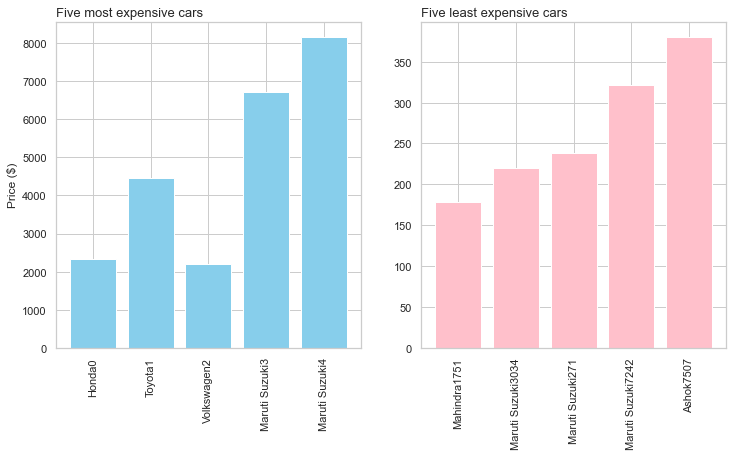

In [155]:
most_expensive_x = cars.index[:5]
most_expensive_y = cars['Price'].head(5)

cars_least = cars.sort_values(by='Price')
least_expensive_x = cars_least.index[:5]
least_expensive_y = cars_least['Price'].head(5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

ax1.bar(most_expensive_x, most_expensive_y, color = "skyblue")
ax1.set_title('Five most expensive cars', fontsize=13, loc = 'left')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.tick_params(axis='x', rotation=90)


ax2.bar(least_expensive_x, least_expensive_y, color = "pink")
ax2.set_title('Five least expensive cars', fontsize=13, loc = 'left')
ax2.tick_params(axis='x', rotation=90)

#Info
print(f"Most expensive car is {cars.index[0]} priced at ${cars.iloc[0]['Price']}") 
print(f"Least expensive car is {cars_least.index[0]} priced at ${cars_least.iloc[0]['Price']}") 
print("Average price of a car is $%.2f"%cars['Price'].mean())

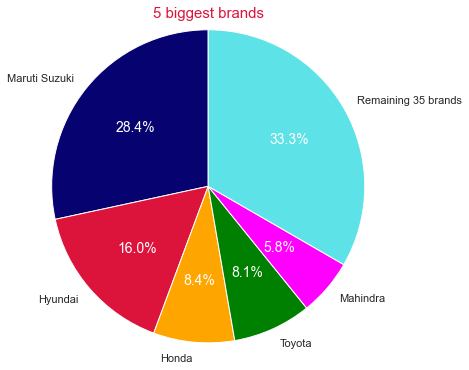

In [156]:
brands = cars.groupby('Brand')['Brand'].count().sort_values(ascending=False)
biggest_brands = cars.groupby('Brand')['Brand'].count().sort_values(ascending=False).head(5)
others_num = cars.groupby('Brand')['Brand'].count().sort_values(ascending=False).tail(brands.count()-5)
others_num_sum = others_num.sum()
all_brands = cars.groupby('Brand').count().sort_values(by='model', ascending = False).count()['model']
big_brands_many = biggest_brands.count() - 1

fig, ax = plt.subplots(1, figsize=(12, 6)) 
label_others = f'Remaining {all_brands - big_brands_many } brands'
others = pd.Series(others_num_sum, index=[label_others])
biggest_brands = pd.concat([biggest_brands, others])
labels = biggest_brands.index

ax.pie(biggest_brands, labels=labels, autopct='%1.1f%%', startangle=90, radius=1.2, 
       colors = ['#060270', 'crimson', 'orange', 'green', 'magenta', '#5DE2E7'])

ax.set_title('5 biggest brands', size = 15, color='crimson')



for text in ax.texts:
    if '%' in text.get_text():  
        text.set_color('white')  
        text.set_fontsize(14)    
        
        
plt.show()


In [157]:
budget = 5000
affordable = cars[cars['Price']<=budget]
total_cars = cars.count()['Brand']
many_affordable = affordable.count()['Brand']
aff_cars_df = pd.DataFrame(data = [many_affordable, total_cars], columns = ['Brand'], index = [f"Affordable cars < $ {budget}", 'Other cars'])
aff_cars_df

,Brand
Affordable cars < $ 5000,2999
Other cars,9582


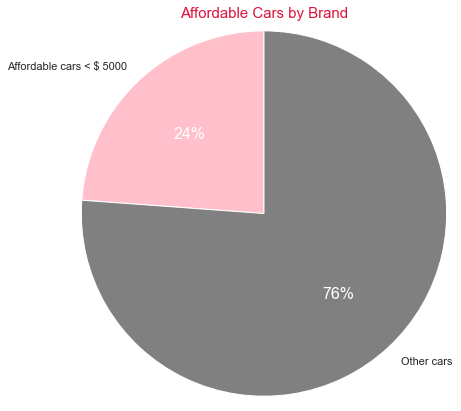

In [158]:
fig, ax = plt.subplots(figsize=(10, 7))


ax.pie(
    aff_cars_df['Brand'], 
    labels=aff_cars_df.index, 
    autopct=lambda pct: f'{pct:.0f}%', 
    startangle=90, 
    radius=1.2, 
    colors=['pink', 'grey']  
)


for text in ax.texts:
    if '%' in text.get_text():  
        text.set_color('white')  
        text.set_fontsize(16)    

ax.set_title("Affordable Cars by Brand", fontsize=15, color='crimson')


plt.show()


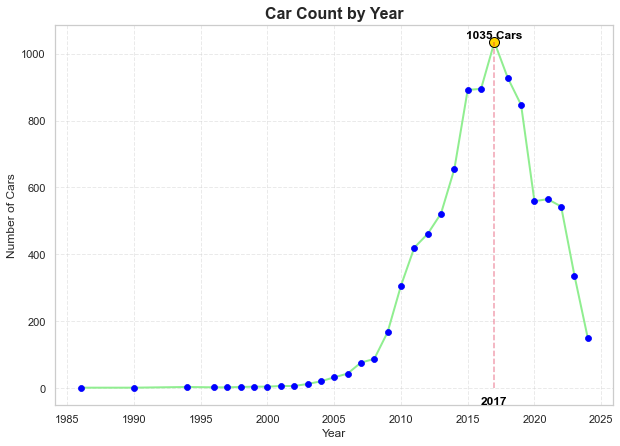

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming car_years is a Pandas Series
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 7))

# Plotting with Seaborn
sns.lineplot(
    x=car_years.index, 
    y=car_years, 
    ax=ax, 
    marker="o", 
    linewidth=2, 
    color='lightgreen', 
    markerfacecolor='blue', 
    markeredgecolor='blue'
)

# Highlighting the maximum value
max_index = car_years.idxmax()
max_value = car_years.max()

# Plotting the max point in a different color and larger size
ax.plot(max_index, max_value, 'o', markersize=10, markerfacecolor='gold', markeredgecolor='black')

# Annotating the maximum value and year
ax.text(max_index, max_value + 12, f"{max_value} Cars", color='black', ha='center', fontsize=12, fontweight='bold')
ax.text(max_index, -25, f"{max_index}", color='black', ha='center', fontsize=12, fontweight='bold', va='top')

# Adding a vertical line to connect the annotations
ax.vlines(x=max_index, ymin=0, ymax=max_value, colors='crimson', linestyles='--', alpha=0.4)

# Customizing labels and title
ax.set_title("Car Count by Year", fontsize=16, fontweight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Cars", fontsize=12)

# Adding gridlines for better visibility
ax.grid(True, linestyle='--', alpha=0.4)

plt.show()


In [293]:
car_brand_year = cars[['Brand', 'Year']]
df_year_cars = pd.DataFrame(index = car_brand_year['Brand'].unique(), columns = sorted(car_brand_year['Year'].unique()))

for year in df_year_cars.columns.to_list():
    cars_filled = car_brand_year[car_brand_year['Year'] == year].groupby('Brand').count()
    brands_filled = cars_filled_2001.index
    for value in df_year_cars[year].values:
        df_year_cars[year] = cars_filled
    
df_year_cars = df_year_cars.fillna(0)

total_car_sold = df_year_cars.sum().sum()

share_sales_car = {}
for car in df_year_cars.index:
    share_sales_car[car] = round((df_year_cars.loc[car].sum()/total_car_sold)*100, 2)



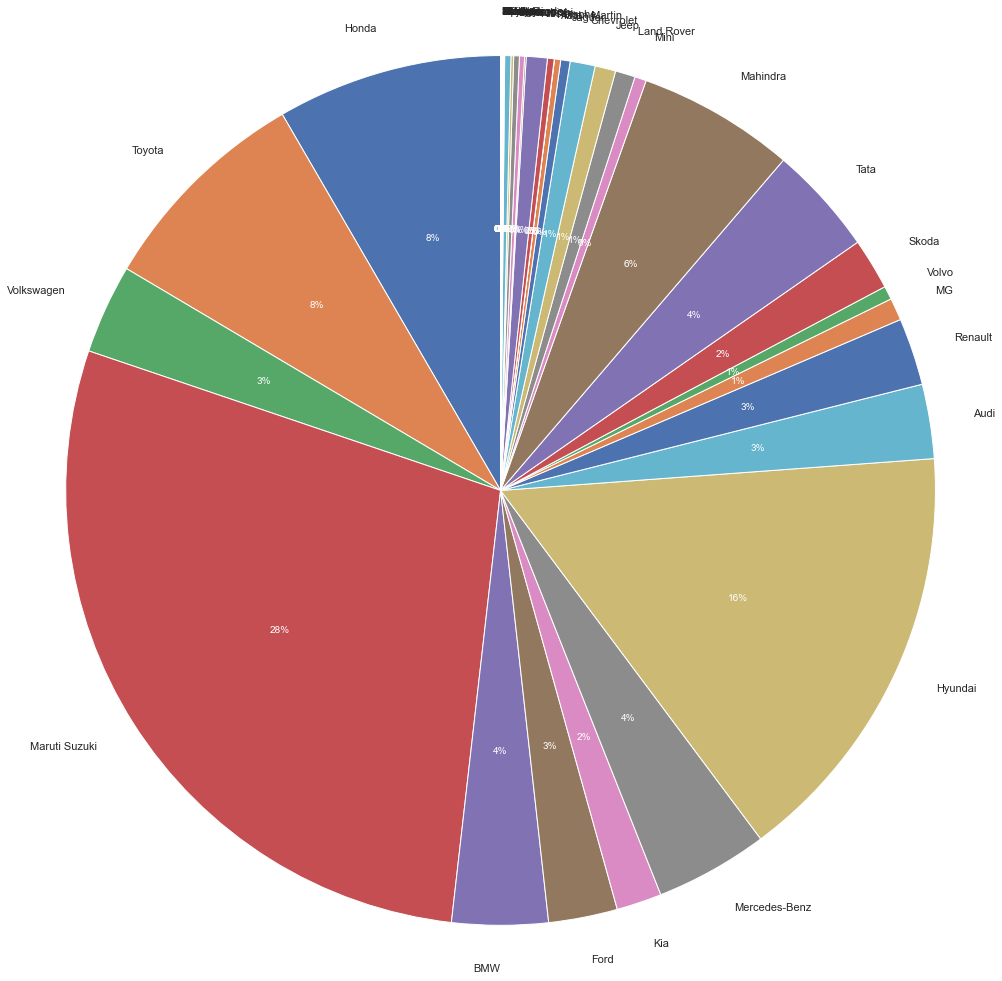

In [306]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    share_sales_car.values(), 
    labels=share_sales_car.keys() , 
    autopct=lambda pct: f'{pct:.0f}%', 
    startangle=90, 
    radius=2
)


for text in ax.texts:
    if '%' in text.get_text():  
        text.set_color('white')  
        text.set_fontsize(10)    


plt.show()

[2, 1, 2, 1]